
<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Исправила!
</div>

In [3]:
# Сделаем так, чтобы во всех датафреймах всегда выводились все столбцы
pd.set_option('display.max_columns', None)

# Выведем на экран первые 5 строк датафрейма
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отлично, что ты увеличиваешь лимит для отображаемых столбцов, чтобы было видно всю таблицу
</div>

In [4]:
# Выведем на экран общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# Переименуем столбцы в соответствии с принятыми правилами названия
data = data.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000',
    'studio': 'is_studio',
    'open_plan': 'is_open_plan'
}
                  )

# Проверим, все ли получилось
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

In [6]:
# Проверим, есть ли в таблице дубликаты
display(data.duplicated().sum())

0

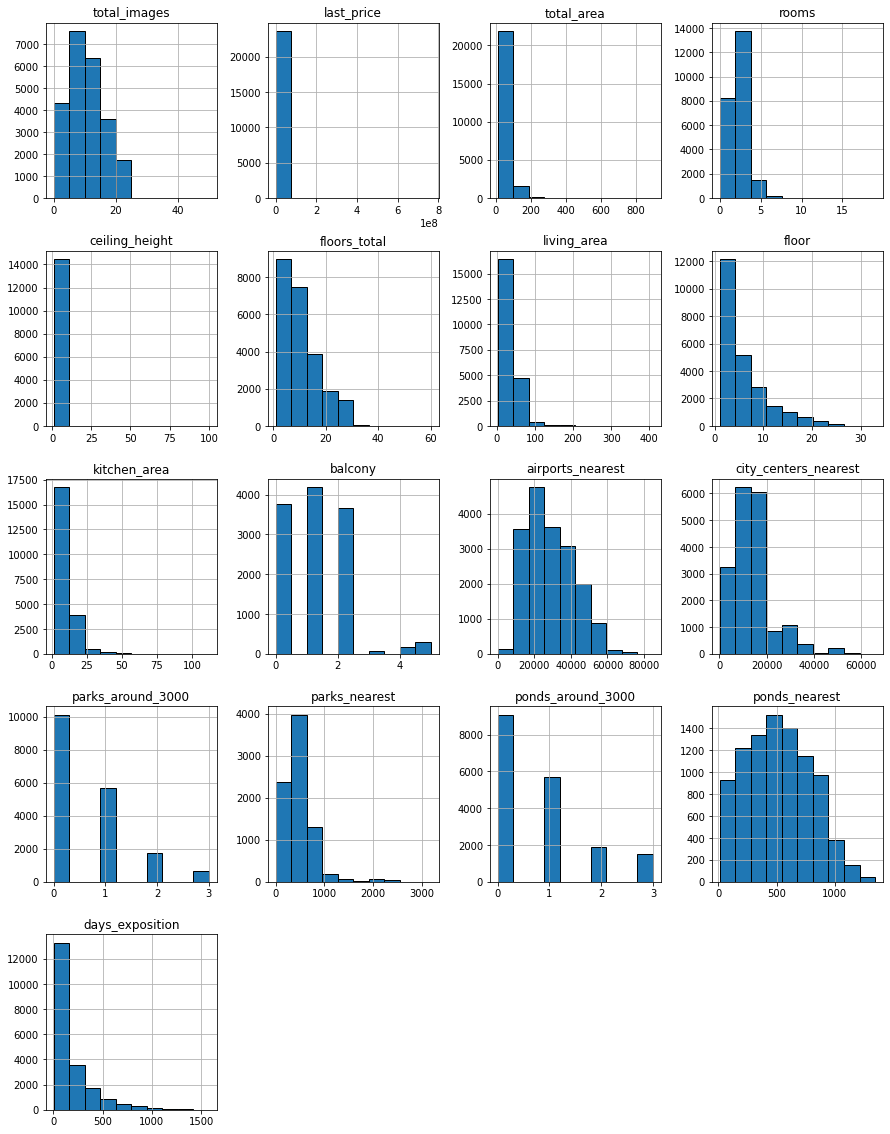

In [7]:
# Построим гистограммы для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20), ec='black');

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Сделала! Спасибо :)
</div>

Все столбцы теперь имеют корректные названия. Дубликатов строк нет. Есть столбцы, в которых пропущены значения, в некоторых столбцах указан неверный тип данных. Далее проведем предобработку данных.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

## Выполните предобработку данных

### Работа с пропущенными значениями и дубликатами

Исходя из данных выше, пропуски есть в следующих столбцах:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- city_centers_nearest
- parks_around_3000
- parks_nearest
- ponds_around_3000
- ponds_nearest
- days_exposition

Сначала осуществим логичные замены:
1. В столбце 'balcony' заменим все пропуски на 0, т.к. если продавец не указал число балконов, то, скорее всего, в его квартире их нет.
2. Для строк, в которых есть пропуски в столбце 'living_area', но при этом нет пропусков в столбце 'kitchen_area', заменим значения в 'living_area' на разность столбцов 'total_area' и 'kitchen_area'.
3. Для столбца 'is_apartment' заменим пропуски на False, т.к. если продавец не указал, является ли квартира апартаментами, то, скорее всего, не является.

In [8]:
# В столбце 'balcony' заменим все пропуски на 0
data['balcony'] = data['balcony'].fillna(0)

# В столбце 'living_area' заменим пропуски на разность столбцов 'total_area' и 'kitchen_area', где это возможно
data['living_area'] = data['living_area'].fillna(data['total_area']-data['kitchen_area'])

# В столбце 'is_apartment' заменим все пропуски на 'False'
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Это не совсем правильный способ замены  пропусков, так как в нежилую площадь входит не только кухня, но и коридоры, кладовки и санузел. 
</div>

Таким образом, в столбцах 'balcony' и 'is_apartment' пропусков больше нет, а в столбце 'living_area' количество данных увеличилось с 21796 до 22235. Однако проделать то же самое для столбца 'kitchen_area' невозможно, т.к. в некоторых квартирах, где есть пропуски в столбце 'kitchen_area' зоны кухни может не быть, либо она совмещена с жилой зоной.

Далее рассмотрим некоторые столбцы более детально.

Для начала, проверим уникальные значения в столбце 'locality_name', чтобы найти возможные варианты работы с пропусками и дубликатами. 

In [9]:
# Сделаем так, чтобы выводились все строки
pd.set_option('display.max_rows', None)

# Выведем на экран все уникальные значения столбца 'locality_name' в алфавитном порядке
print(data['locality_name'].value_counts().sort_index(ascending=True))

# Вернем выводимое количество строк обратно
pd.reset_option('display.max_rows')

Бокситогорск                                                  16
Волосово                                                      36
Волхов                                                       111
Всеволожск                                                   398
Выборг                                                       237
Высоцк                                                         4
Гатчина                                                      307
Зеленогорск                                                   24
Ивангород                                                     28
Каменногорск                                                  13
Кингисепп                                                    104
Кириши                                                       125
Кировск                                                       84
Колпино                                                      338
Коммунар                                                      89
Красное Село             

Можно заметить, что некоторые названия поселков записаны через букву 'ё'. Замением все 'ё' на 'е'.

In [10]:
# Проверим количество уникальных значений до замены
print(f"Кол-во уникальных значений до замены: {data['locality_name'].nunique()}")

# Осуществим замену всех букв 'ё' в столбце 'locality_name' на 'е'
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

# Уберем чувстительность к регистру
data['locality_name'] = data['locality_name'].str.lower() 

# Проверим, прошла ли замена
print(f"Кол-во уникальных значений после замены: {data['locality_name'].nunique()}")

Кол-во уникальных значений до замены: 364
Кол-во уникальных значений после замены: 330


Получилось избавиться от 34 дубликатов.

Проведем замены значений 'поселок городского типа' и 'городской поселок' на 'поселок' и проверим, удалось ли избавиться от дубликатов таким способом.

In [11]:
# Проверим количество уникальных значений до замены
print(f"Кол-во уникальных значений до замены: {data['locality_name'].nunique()}")

# Произведем замену
data['locality_name'] = data['locality_name'].replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)

# Проверим, прошла ли замена
print(f"Кол-во уникальных значений после замены: {data['locality_name'].nunique()}")

Кол-во уникальных значений до замены: 330
Кол-во уникальных значений после замены: 322


Таким образом, удалось избавиться еще от 8 дубликатов.

Строки, в которых значений нет, удалим, т.к. эти объявления не имеют смысла без названия населенного пункта, где находится квартира.

In [12]:
# Удалим строки с пропусками
data = data.dropna(subset=['locality_name'])

# Проверим, остались ли еще пропуски в этом столбце
print(data['locality_name'].isna().sum())

0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

Проверим, можно ли заменить данные в столбце 'floors_total' значением 1, имея гипотезу о том, что пользователи не указали количество этажей из-за того, что их дом одноэтажный и они живут на первом этаже.

In [13]:
# Выведем на экран все строки датафрейма с пропусками в столбце 'floors_total'
display(data.loc[data['floors_total'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,False,False,12.00,0.0,санкт-петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,False,False,NaN,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,False,False,10.63,0.0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,False,False,16.80,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,False,False,NaN,0.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,False,False,False,NaN,0.0,санкт-петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,False,False,False,14.40,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,False,False,False,23.42,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,False,False,False,23.60,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


В таблице видно, что строки с пропущенными значениями в столбце 'floors_total' имеют совершенно разные значения в столбце 'floor'. Гипотеза не подтвердилась, производить замену нельзя. Присвоим пропускам во 'floors_total' значения этажей из 'floor'.

In [14]:
# Произведем замену
data.loc[data['floors_total'].isnull(), 'floors_total'] = data.loc[data['floors_total'].isnull(), 'floor']

# Осуществим проверку и выведем кол-во строк датафрейма с пропусками в столбце 'floors_total'
display(data['floors_total'].isna().sum())

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший способ)
</div>

Выдвинем гипотезу о том, что в столбцах 'parks_around_3000' и 'ponds_around_3000' пропущенные значения можно заменить на 0, т.к. это будет значить, что парки/пруды в радиусе 3000 м отсутствуют. Для этого сначала выведем на экран все строки датафрейма с пропусками в столбцах 'parks_around_3000' и 'ponds_around_3000', чтобы убедиться, что в соседних столбцах 'parks_nearest' и 'ponds_nearest' значения либо отсутствуют, либо больше 3000.

In [15]:
# Выведем на экран все строки датафрейма с пропусками в столбце 'parks_around_3000'
display(data.loc[data['parks_around_3000'].isna()])

# Выведем на экран все строки датафрейма с пропусками в столбце 'ponds_around_3000'
display(data.loc[data['ponds_around_3000'].isna()])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,False,NaN,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.50,0.0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,False,False,6.00,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,False,False,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,False,False,NaN,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,False,NaN,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.50,0.0,поселок дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,False,False,6.00,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,False,False,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,False,False,NaN,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Смело можем производить замену пропусков. Этот шаг избавит нас от всех пропусков в столбцах 'parks_around3000' и 'ponds_around3000'.

In [16]:
# В столбце 'parks_around_3000' заменим все пропуски на 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

# В столбце 'ponds_around3000' заменим все пропуски на 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

**Причины, которые могли привести к пропускам данных**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 

При ручном вводе пользователь мог не указать какие-то данные по невнимательности, ошибочно пропустив ячейку, или же намеренно, чтобы скрыть какие-то минусы квартиры на продажу. Что касается данных, полученных автоматически, пропуски в некоторых строках могут возникунть из-за технических ошибок.

### Работа с типами данных

In [17]:
# Повторно выведем на экран общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           22190 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  is_studio             23650 non-null  bool   
 11  is_open_plan          23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменим тип данных в столбцах:
- first_day_exposition — на datetime для дальнейшей работы с числом, месяцем годом или временем;
- floors_total — на int, т.к. кол-во этажей - это целое число;
- balcony — на int, т.к. кол-во балконов - это целое число;
- parks_around_3000 — на int, т.к. кол-во парков - это целое число;
- ponds_around_3000 — на int, т.к. кол-во прудов - это целое число.

In [18]:
# Изменим типы данных для столбцов, указанных выше
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around_3000'] = data['parks_around_3000'].astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

# Проверим, все ли замены прошли успешно
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           22190 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  is_studio             23650 non-null  bool          
 11  is_open_plan          23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

## Добавьте в таблицу новые столбцы

Согласно задания, добавим необходимые столбцы:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из *м* в *км* и округлите до ближайших целых значений).

In [19]:
# Добавим столбец с ценой одного квадратного метра
data['price_per_meter'] = round((data['last_price'] / data['total_area']), 2)

# Добавим столбец c днем недели публикации объявления
data['day_of_the_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

# Добавим столбец c месяцем публикации объявления
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

# Добавим столбец c годом публикации объявления
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

# Добавим столбец с расстоянием до центра в километрах
data['city_centers_nearest_km'] = round((data['city_centers_nearest'] / 1000), 2)

# Добавим столбец с типом этажа квартиры
def floor_type(data_x):
    if data_x['floor'] == 1:
        return 'первый'
    elif data_x['floor'] == data_x['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

# Проверим новые столбцы
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,16.03,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,18.60,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,13.93,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,6.80,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,8.10,другой


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

## Исследовательский анализ данных

### Анализ столбцов 'total_area', 'living_area', 'kitchen_area'

,total_area,living_area,kitchen_area
count,23650.000000,22190.000000,21381.000000
mean,60.329069,34.896587,10.566403
std,35.661808,23.117144,5.901753
min,12.000000,2.000000,1.300000
25%,40.000000,18.800000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.700000,42.800000,12.000000
max,900.000000,571.000000,112.000000


<AxesSubplot:>

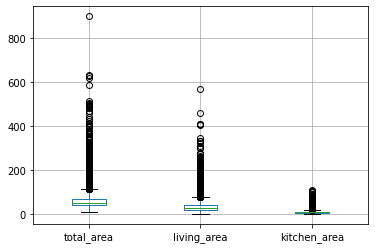

In [20]:
# Выведем на экран основные характеристики для столбцов 'total_area', 'living_area', 'kitchen_area'
display(data[['total_area', 'living_area', 'kitchen_area']].describe())

# Построим диаграммы размаха для столбцов 'total_area', 'living_area', 'kitchen_area'
data.boxplot(['total_area', 'living_area', 'kitchen_area'])

Сразу выделим подозрения на аномальные значения: 
- в столбце 'total_area' — аномально большие значения около 900 и около 600
- в столбце 'living_area' — неправдоподобно маленькое минимальное значение 2 и аномально большие около 500

In [21]:
# Выведем на экран строку с аномально большим значением в столбце 'total_area'
display(data.loc[data['total_area'] > 600])

# Выведем на экран строки со значением в столбце 'living_area' меньше, чем 10.
display(data.loc[data['living_area'] < 6])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5,571.0,5,False,False,False,60.0,0,санкт-петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,221870.05,5,3,2019,4.97,последний
12859,20,140000000.0,631.2,2019-04-09,7,3.9,4,322.3,4,False,False,False,19.5,1,санкт-петербург,25707.0,4972.0,0,NaN,2,210.0,NaN,221799.75,1,4,2019,4.97,последний
15651,20,300000000.0,618.0,2017-12-18,7,3.4,7,258.0,5,False,False,False,70.0,0,санкт-петербург,32440.0,5297.0,0,NaN,2,198.0,111.0,485436.89,0,12,2017,5.30,другой
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106.0,466666.67,2,12,2017,7.88,последний


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,False,False,False,11.0,0,санкт-петербург,19272.0,13073.0,0,NaN,0,NaN,216.0,108292.68,6,7,2017,13.07,последний
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,False,False,9.0,0,санкт-петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0,122115.38,1,2,2018,6.52,другой
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,False,True,False,NaN,2,санкт-петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,121818.18,5,8,2018,11.62,другой
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,True,False,NaN,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,66.0,101304.35,0,1,2018,NaN,другой
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9,5.4,1,False,False,False,9.8,0,санкт-петербург,29338.0,11270.0,1,584.0,0,NaN,33.0,78608.25,3,2,2019,11.27,первый
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8,3.0,8,False,False,False,16.0,1,санкт-петербург,33255.0,5975.0,1,630.0,3,100.0,280.0,467553.96,1,11,2015,5.98,последний


Исходя из таблицы выше, видим, что для двух объявлений, где 'total_area' составляет 900 и 618, неправдоподобно высокая цена за метр, достигающая почти пол миллиона у.е. Принимаем решение об удалении подозрительных строк.

Также находим 6 строк, где 'living_area' подозрительно маленькая, при адекватной общей площади квартриры. Возможно, пользователь не верно понял назначение ячейки и указал не то, что требовалось. Заменим эти значения на разность 'total_area' и 'kitchen_area'. Для строк, где не указана 'kitchen_area', заменим значение в стобце 'living_area' значением из 'total_area'.

In [22]:
# Перезапишим датафрейм без аномальных значений в столбце 'total_area' - 900 и 618
data = data.loc[~data['total_area'].isin([900, 618])]

# Перезапишим датафрейм без аномальных значений в столбце 'living_area'
data.loc[(data['living_area'] < 6) & (data['kitchen_area'] > 0), 'living_area'] = data['total_area'] - data['kitchen_area']

# Проверим, остались ли строки, где в столбце 'kitchen_area' отсутствуют данные
display(data.loc[data['living_area'] < 6])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,False,True,False,NaN,2,санкт-петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,121818.18,5,8,2018,11.62,другой
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,True,False,NaN,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,66.0,101304.35,0,1,2018,NaN,другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type


,total_area,living_area,kitchen_area
count,23648.000000,22188.000000,21379.000000
mean,60.269980,34.882638,10.558878
std,35.055691,22.935195,5.846997
min,12.000000,6.000000,1.300000
25%,40.000000,18.800000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.700000,42.800000,12.000000
max,631.200000,571.000000,107.000000


<AxesSubplot:>

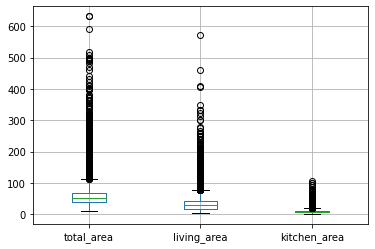

In [23]:
# Проводим замену в стобце 'living_area' значением из 'total_area' для двух оставшихся строк
data.loc[(data['living_area'] < 6), 'living_area'] = data['total_area']

# Еще раз делаем проверку, что замена прошла
display(data.loc[data['living_area'] < 6])

# Снова выведем на экран основные характеристики для столбцов 'total_area', 'living_area', 'kitchen_area'
display(data[['total_area', 'living_area', 'kitchen_area']].describe())

# Снова построим диаграммы размаха для столбцов 'total_area', 'living_area', 'kitchen_area'
data.boxplot(['total_area', 'living_area', 'kitchen_area'])

Медианное значение для общей площади по всем объявлениям составляет 52 кв.м, где жилая площадь (медианное значение столбца 'living_area') составляет 30 кв.м и площадь кухни (медианное 'kitchen_area') около 9.1 кв.м, оставляя около 10 кв.м на санузлы, кладовые, балконы и лоджии. Подтверждая правдивость данных.

### Анализ столбца 'last_price'

count    2.364800e+04
mean     6.511234e+06
std      1.038603e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.792250e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

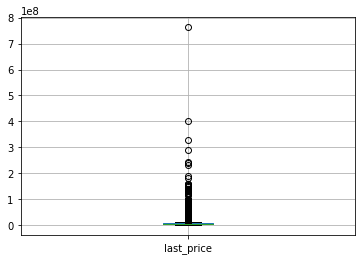

In [24]:
# Выведем на экран основные характеристики для столбца 'last_price'
display(data['last_price'].describe())

# Построим диаграммы размаха для столбца 'last_price'
data.boxplot('last_price')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

По графику можно заметить одно аномально большое значение — 763 млн. Оно выглядит очень неправдоподобным, проверим остальные характеристики этой квартиры.

Также видим, что минимальная стоимость квартиры — 12190 у.е. Это достаточно маленькое значение, при среднем 6,48 млн. у.е. Проверим все значения, меньше 500 тыс. у.е.

In [25]:
# Выведем на экран строку с аномально большим значением в столбце 'last_price' 
display(data.loc[data['last_price'] == 763000000])

# Выведем на экран строки со значением в столбце 'last_price' меньше, чем 500 тыс. у.е.
display(data.loc[data['last_price'] < 500000])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10,250.0,10,False,False,False,NaN,2,санкт-петербург,25108.0,3956.0,1,530.0,3,756.0,33.0,1907500.0,5,9,2017,3.96,последний


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,False,False,False,5.8,0,поселок будогощь,NaN,NaN,0,NaN,0,NaN,233.0,10714.29,0,7,2017,NaN,первый
6859,6,490000.0,40.0,2017-12-11,1,NaN,5,NaN,3,False,False,False,NaN,0,деревня старополье,NaN,NaN,0,NaN,0,NaN,43.0,12250.00,0,12,2017,NaN,другой
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,111.83,2,3,2019,9.18,последний
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.3,3,False,False,False,5.5,0,деревня старополье,NaN,NaN,0,NaN,0,NaN,96.0,10368.66,4,8,2018,NaN,другой
10782,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,False,False,False,5.5,0,сланцы,NaN,NaN,0,NaN,0,NaN,719.0,16838.49,3,5,2016,NaN,последний
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,NaN,3,False,False,False,NaN,0,поселок станции свирь,NaN,NaN,0,NaN,0,NaN,44.0,7962.96,1,6,2018,NaN,последний
16032,8,480000.0,32.0,2019-01-06,1,NaN,2,16.0,1,False,False,False,NaN,0,сланцы,NaN,NaN,0,NaN,0,NaN,83.0,15000.00,6,1,2019,NaN,первый
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,NaN,1,False,False,False,NaN,0,деревня вахнова кара,NaN,NaN,0,NaN,0,NaN,45.0,11688.31,2,7,2018,NaN,первый
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,NaN,1,False,False,False,NaN,0,деревня старополье,NaN,NaN,0,NaN,0,NaN,45.0,11000.00,1,7,2018,NaN,первый
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,False,False,False,6.0,0,сланцы,NaN,NaN,0,NaN,0,NaN,NaN,14144.74,0,4,2019,NaN,первый


Убеждаемся, что значение неправдоподобно большое. Общая площадь составляет 400 кв.м., а цена за кв.м достигает почти 2 млн. у.е. Принимаем решение об удалении этой строчки.

Также исходя из таблицы со значеними меньше 500 тыс. у.е., видим, что аномально маленькое значение только одно. Сделаем предположение о том, что пользователь при вводе ошибся и указал сумму в тысячах у.е. Сделаем замену.

count    2.364700e+04
mean     6.479758e+06
std      9.147188e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.794500e+06
max      4.013000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

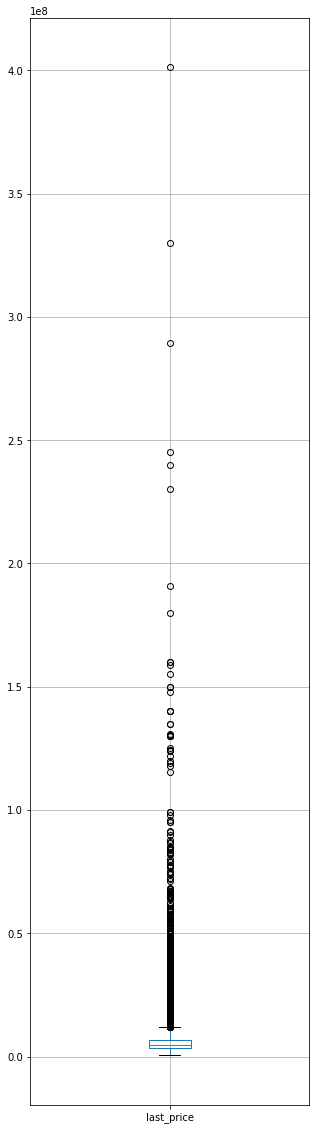

In [26]:
# Перезапишим датафрейм (удалим строку) без аномального значения в столбце 'last_price' - 763000000 у.е.
data = data.loc[data['last_price'] != 763000000]

# Сделаем замену в столбце 'last_price' с 12190 у.е. на 12190000 у.е.
data['last_price'] = data['last_price'].replace(12190, 12190000, regex=True)

# Проверим замены:
# Выведем на экран основные характеристики для столбца 'last_price'
display(data['last_price'].describe())

# Построим диаграмму размаха для столбца 'last_price'
data['last_price'].plot(kind='box', grid=True, figsize=(5, 20))

Средняя цена на квартиры 6,48 млн. у.е.; максимальная цена — 401 млн. у.е., минимальная — 430 тыс.у.е.

По графику и описанию данных выше мы видим, что в основном данные находятся в диапазоне от 3,4 млн. у.е. до 6,79 млн. у.е. Но помимио этого, достаточное количество данных лежит за пределами этих значений. Можем сделать вывод, что среди наших объявлений есть еще те, которые составляют рынок "элитной" недвижимости, с большой общей площадью и высокими ценами на жилье.

### Анализ столбца 'rooms'

count    23647.000000
mean         2.069269
std          1.075799
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

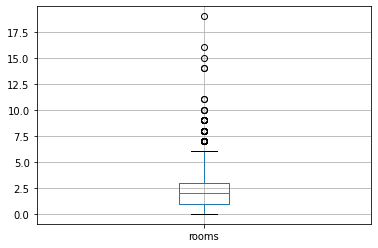

In [27]:
# Выведем на экран основные характеристики для столбца 'rooms'
display(data['rooms'].describe())

# Построим диаграмму размаха для столбца 'rooms'
data.boxplot('rooms')

Видим, что есть квартиры с подозрительно большим количеством комнат. Рассмотрим их более детально.

In [28]:
# Выведем на экран строки, в которых в столбце 'rooms' 10 или более комнат
display(data.loc[data['rooms'] >= 10])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,санкт-петербург,23606.0,3148.0,0,NaN,0,NaN,NaN,95264.02,6,7,2018,3.15,последний
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,санкт-петербург,38076.0,7950.0,0,NaN,2,435.0,418.0,68870.52,5,12,2017,7.95,другой
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7,145.9,7,False,False,False,18.8,1,санкт-петербург,10726.0,12169.0,1,191.0,1,531.0,NaN,84372.71,3,1,2018,12.17,последний
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,санкт-петербург,24447.0,4666.0,1,767.0,0,NaN,14.0,110169.49,3,2,2019,4.67,другой
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,санкт-петербург,21469.0,1015.0,1,686.0,2,66.0,813.0,170015.46,1,2,2017,1.01,другой
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,False,False,False,27.6,0,санкт-петербург,19497.0,3574.0,0,NaN,2,548.0,114.0,86091.83,5,6,2018,3.57,другой
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,False,19.8,0,санкт-петербург,24353.0,4921.0,1,368.0,0,NaN,11.0,71726.05,0,7,2016,4.92,другой
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,санкт-петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0,105555.56,0,3,2015,4.14,последний
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6,189.4,6,False,False,False,30.0,1,санкт-петербург,26229.0,4932.0,3,316.0,1,227.0,77.0,137931.03,1,6,2016,4.93,последний
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4,168.3,2,False,False,False,25.9,0,санкт-петербург,21104.0,2054.0,3,541.0,2,118.0,95.0,116784.84,3,3,2016,2.05,другой


Их цена, общая площадь не выбиваются и кажутся нормальными. Оставим эти данные как есть.

Дополнительно построим гистограмму, чтобы посмотреть, как распределяются объявления с квартирами по количеству комнат.

<AxesSubplot:title={'center':'Гистограмма с распределением объявлений по количеству комнат в квартире'}, ylabel='Frequency'>

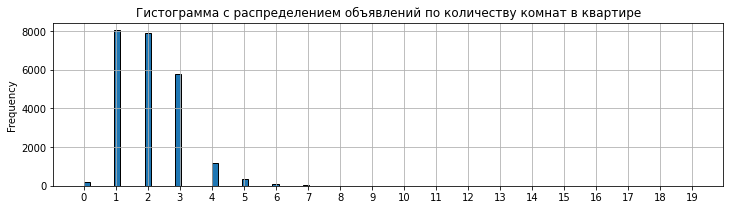

In [29]:
# Построим гистограмму для столбца 'rooms'
data['rooms'].plot(kind='hist', bins=100, grid=True, ec='black', xticks=(np.arange(min(data['rooms']), max(data['rooms'])+1, 1.0)), title='Гистограмма с распределением объявлений по количеству комнат в квартире', figsize=(12,3))

В основном в объявлениях встречаются одно-, двух- и трехкомнатные квартиры.

### Анализ столбца 'ceiling_height'

count    14488.000000
mean         2.771242
std          1.261670
min          1.000000
25%          2.517500
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

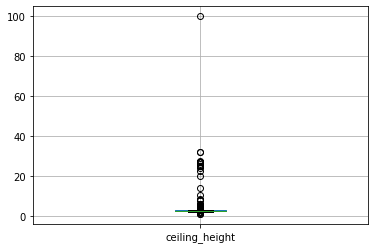

In [30]:
# Выведем на экран основные характеристики для столбца 'ceiling_height'
display(data['ceiling_height'].describe())

# Построим диаграмму размаха для столбца 'ceiling_height'
data.boxplot('ceiling_height')

Минимально допустимая высота потолка — 2.4 м. Допустим, что есть дома, которые были построены с отклонениями от норм, в них высота потолка 2.3 м. С потолками ниже жить уже невозможно. 

Посмотрим на все строки, где значения в 'ceiling_height' меньше 2.3.

In [31]:
# Посчитаем количество объявлений с потолками меньше 2.3 м
print(f"Всего найдено {len(data.loc[data['ceiling_height'] < 2.3])} объявлений с потолками ниже 2.3 м")

# Выведем на экран строки со значением в столбце 'ceiling_height' меньше 2.3 м
display(data.loc[data['ceiling_height'] < 2.3])

Всего найдено 16 объявлений с потолками ниже 2.3 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
552,11,2999000.0,33.50,2017-03-30,1,2.00,15,17.500000,6,False,False,False,6.50,0,санкт-петербург,33972.0,11746.0,1,520.0,1,949.0,270.0,89522.39,3,3,2017,11.75,другой
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5,40.000000,4,False,False,False,6.00,1,луга,NaN,NaN,0,NaN,0,NaN,NaN,38709.68,3,12,2018,NaN,другой
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.600000,9,False,False,False,8.80,2,тосно,NaN,NaN,0,NaN,0,NaN,36.0,59836.30,0,12,2017,NaN,другой
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2,27.500000,1,False,False,False,5.20,0,поселок мга,NaN,NaN,0,NaN,0,NaN,248.0,35046.73,0,8,2017,NaN,первый
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5,NaN,5,False,False,False,NaN,0,луга,NaN,NaN,0,NaN,0,NaN,100.0,46478.87,1,5,2018,NaN,последний
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17,15.200000,12,False,False,False,10.10,0,поселок металлострой,25268.0,26980.0,0,NaN,0,NaN,53.0,91666.67,6,6,2017,26.98,другой
12755,2,1400000.0,22.50,2017-09-21,1,2.20,2,18.000000,2,False,False,False,4.50,1,село копорье,NaN,NaN,0,NaN,0,NaN,45.0,62222.22,3,9,2017,NaN,последний
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5,63.900000,2,False,False,False,12.00,0,санкт-петербург,38415.0,7675.0,1,568.0,1,154.0,NaN,139297.85,1,3,2019,7.68,другой
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5,20.000000,5,False,False,False,6.00,0,выборг,NaN,NaN,0,NaN,0,NaN,6.0,45454.55,2,10,2018,NaN,последний
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37,17.400000,5,False,False,False,8.34,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,71.0,102500.00,1,10,2017,20.44,другой


Всего найдено 16 строк с неверным значением в столбце 'ceiling_height'. Т.к. таких строк не много и это не особо повлияет на статистику, принимаем решение о замене этих значений на минимально разрешеное — 2.4. 

Мы не удаляем эти строки, т.к. в других столбцах могут храниться важные для нас данные, а удалять целые строки из-за не особо релевантного столбца с высотой потолоков считаю нецелесообразным.

In [32]:
# Произведем замену
data['ceiling_height'] = data['ceiling_height'].replace([1, 1.2, 1.75, 2, 2.2, 2.25], 2.4, regex=True)

# Проверим, прошла ли замена
print(f"Всего найдено {len(data.loc[data['ceiling_height'] < 2.3])} объявлений с потолками ниже 2.3 м")

Всего найдено 0 объявлений с потолками ниже 2.3 м


По графику видно, что есть одно аномально большое значение — 100 м и несколько примерно от 10 до 37 м. Также рассмотрим поближе все строки, в которых в столбце 'ceiling_height' высота потолков составляет более 4 метров, т.к. такие данные выглядят подозрительными.

In [33]:
display(data.loc[data['ceiling_height'] > 4])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
154,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.2,2,False,False,False,12.2,0,санкт-петербург,20562.0,3167.0,2,344.0,1,838.0,38.0,102500.00,1,11,2018,3.17,другой
355,17,3600000.0,55.2,2018-07-12,2,25.00,5,32.0,2,False,False,False,NaN,2,гатчина,NaN,NaN,0,NaN,0,NaN,259.0,65217.39,3,7,2018,NaN,другой
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.5,7,False,False,False,21.1,0,санкт-петербург,26316.0,6655.0,3,187.0,1,616.0,578.0,237499.11,3,6,2015,6.66,другой
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.0,3,False,False,False,63.0,2,санкт-петербург,24899.0,4785.0,0,NaN,1,603.0,NaN,500000.00,4,10,2018,4.78,последний
1053,13,550000.0,29.0,2018-02-01,1,5.00,3,NaN,1,False,False,False,NaN,0,бокситогорск,NaN,NaN,0,NaN,0,NaN,6.0,18965.52,3,2,2018,NaN,первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30,1,10.30,16,15.5,15,False,False,False,NaN,0,санкт-петербург,36353.0,11936.0,2,440.0,2,450.0,136.0,117777.78,5,9,2017,11.94,другой
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6,55.5,5,False,False,False,16.5,4,санкт-петербург,18838.0,3506.0,0,NaN,3,511.0,NaN,108214.29,4,4,2019,3.51,другой
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9,274.0,9,False,False,False,45.0,0,санкт-петербург,25525.0,5845.0,2,116.0,0,NaN,115.0,185488.80,5,5,2017,5.84,последний
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5,14.0,5,True,False,False,11.0,5,санкт-петербург,34963.0,8283.0,1,223.0,3,30.0,19.0,600000.00,2,7,2018,8.28,последний


Сначала обработаем значения из диапазона от 23 до 40. Предположим, что люди, которые вводили эти значения, упустили разделительный знак. Чтобы обработать эти значения, разделим их на 10.

In [34]:
# Обработаем значения от 23 до 40
data.loc[(data['ceiling_height'] > 23) & (data['ceiling_height'] < 40), 'ceiling_height'] = data['ceiling_height']/10

# Выведем на экран все аномальные значения, которые остались
display(data.loc[data['ceiling_height'] > 4])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
154,1,8200000.0,80.0,2018-11-06,3,4.15,3,44.2,2,False,False,False,12.2,0,санкт-петербург,20562.0,3167.0,2,344.0,1,838.0,38.0,102500.00,1,11,2018,3.17,другой
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.5,7,False,False,False,21.1,0,санкт-петербург,26316.0,6655.0,3,187.0,1,616.0,578.0,237499.11,3,6,2015,6.66,другой
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.0,3,False,False,False,63.0,2,санкт-петербург,24899.0,4785.0,0,NaN,1,603.0,NaN,500000.00,4,10,2018,4.78,последний
1053,13,550000.0,29.0,2018-02-01,1,5.00,3,NaN,1,False,False,False,NaN,0,бокситогорск,NaN,NaN,0,NaN,0,NaN,6.0,18965.52,3,2,2018,NaN,первый
1129,20,6695000.0,36.9,2018-09-28,1,4.06,5,22.0,2,False,False,False,7.2,0,санкт-петербург,21725.0,2990.0,1,596.0,1,866.0,110.0,181436.31,4,9,2018,2.99,другой
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4,162.0,3,False,False,False,30.0,0,санкт-петербург,24680.0,4247.0,1,464.0,3,339.0,225.0,428571.43,3,7,2018,4.25,другой
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6,NaN,6,False,False,False,NaN,0,санкт-петербург,26204.0,6934.0,2,149.0,2,577.0,719.0,149874.69,2,1,2015,6.93,последний
2639,17,4850000.0,59.7,2017-11-18,3,4.19,5,46.3,4,False,False,False,6.4,1,санкт-петербург,42964.0,15468.0,0,NaN,0,NaN,60.0,81239.53,5,11,2017,15.47,другой
2802,7,14950000.0,50.0,2016-03-06,2,4.80,3,30.0,2,False,False,False,10.0,0,санкт-петербург,24433.0,1725.0,1,589.0,3,161.0,160.0,299000.00,6,3,2016,1.72,другой
2823,8,2700000.0,39.0,2018-02-01,1,4.50,6,18.3,6,False,False,False,8.4,0,поселок токсово,NaN,NaN,0,NaN,0,NaN,NaN,69230.77,3,2,2018,NaN,последний


Таким образом, мы избавились от 20 аномалий.

Остальные заменим на максимально допустимое значение, но при этом отражающее их высоту — 4 м.

In [35]:
# Произведем замену
data.loc[(data['ceiling_height'] > 4), 'ceiling_height'] = 4

# Проверим, прошла ли замена
print(f"Всего найдено {len(data.loc[data['ceiling_height'] > 4])} объявлений с потолками выше 4 м")

Всего найдено 0 объявлений с потолками выше 4 м


### Анализ столбцов 'floors_total' и 'floor_type'

,floors_total
count,23647.000000
mean,10.673362
std,6.593170
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,60.000000


<AxesSubplot:>

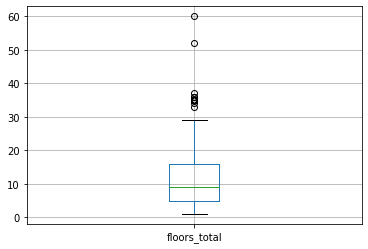

In [36]:
# Выведем на экран основные характеристики для столбца 'floors_total'
display(data[['floors_total', 'floor_type']].describe())

# Построим диаграмму размаха для столбца 'floors_total'
display(data.boxplot('floors_total'))

Видим, что есть подозрительные значения больше 30. Посмотрим их поближе.

In [37]:
# Посчитаем количество таких значений
print(f"Всего найдено {len(data.loc[data['floors_total'] > 30])} объявлений с общей этажностью дома больше 30 этажей")

# Выведем на экран строки с этажностью дом больше 30 этажей
display(data.loc[data['floors_total'] > 30])

Всего найдено 32 объявлений с общей этажностью дома больше 30 этажей


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
397,15,5990000.0,54.0,2018-03-22,2,NaN,36,21.4,28,False,False,False,18.70,1,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,11.0,110925.93,3,3,2018,20.44,другой
871,14,7777777.0,75.0,2017-11-16,2,NaN,35,40.5,23,False,False,False,11.70,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,169.0,103703.69,3,11,2017,20.44,другой
1060,10,5200000.0,50.0,2015-11-06,2,NaN,35,39.0,15,False,False,False,20.50,2,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,281.0,104000.00,4,11,2015,20.44,другой
1697,11,3550000.0,28.0,2018-02-08,1,2.65,34,18.0,23,False,False,False,NaN,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,410.0,126785.71,3,2,2018,20.44,другой
1917,13,10150000.0,74.0,2017-11-17,2,2.80,35,34.4,30,False,False,False,13.00,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,NaN,137162.16,4,11,2017,20.44,другой
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.40,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,83516.48,3,6,2018,49.49,другой
2966,9,4300000.0,37.0,2017-08-08,1,NaN,35,14.0,15,False,False,False,10.40,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,50.0,116216.22,1,8,2017,20.44,другой
4855,12,5500000.0,50.0,2017-06-22,1,2.80,35,22.0,4,False,False,False,13.00,0,санкт-петербург,18627.0,20339.0,1,609.0,3,145.0,537.0,110000.00,3,6,2017,20.34,другой
5749,20,3590000.0,25.0,2017-08-30,0,2.80,35,NaN,26,False,False,True,NaN,2,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,198.0,143600.00,2,8,2017,20.44,другой
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,False,False,False,12.00,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,101875.00,2,1,2019,20.44,другой


Видим, что все объявления с домами такой этажности находятся в Санкт-Петербурге. Воспользовавшись интернетом, узнаем, что самый высокий жилой дом в Санкт-Петербурге - 37 этажей. Значения до 37 включительно оставляем. Теперь проверим, сколько остальных.

In [38]:
# Посчитаем количество таких значений
print(f"Всего найдено {len(data.loc[data['floors_total'] > 37])} объявлений с общей этажностью дома больше 37 этажей")

# Выведем на экран строки с этажностью дом больше 30 этажей
display(data.loc[data['floors_total'] > 37])

Всего найдено 2 объявлений с общей этажностью дома больше 37 этажей


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week_exposition,month_exposition,year_exposition,city_centers_nearest_km,floor_type
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.4,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,83516.48,3,6,2018,49.49,другой
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.0,0,санкт-петербург,20728.0,12978.0,1,793.0,0,NaN,45.0,99450.00,0,9,2018,12.98,другой


Таких значений всего два. Принимаем решение об их удалении.

In [39]:
# Перезапишим датафрейм (удалим строку) без аномальных значения в столбце 'floors_total' - 52 и 60
data = data.loc[~data['floors_total'].isin([52, 60])]

# Проверим, все ли удалилось и снова посчитаем количество значений больше 37
print(f"Всего найдено {len(data.loc[data['floors_total'] > 37])} объявлений с общей этажностью дома больше 37 этажей")

Всего найдено 0 объявлений с общей этажностью дома больше 37 этажей


<AxesSubplot:>

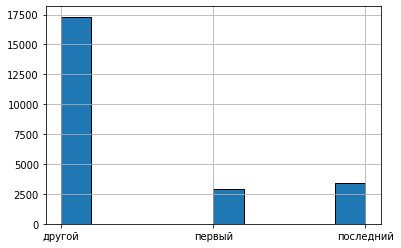

In [40]:
# Построим гистограмму для столбца 'floor_type'
data['floor_type'].hist(ec='black')

Первый квартиль - 5 этажей, медианное значение - 9 этажей, что в целом характерно для застройки в стране.

По гистрограмме 'floor_type' можно сделать вывод о том, что большинство квартир находятся на "срединных" (не первом и не последнем) этажах. И примерно 3000 и 4000 квартир находятся на первом и последнем этажах соответственно.

### Анализ столбцов 'city_centers_nearest' и 'parks_nearest'

,city_centers_nearest,parks_nearest
count,18134.000000,8061.000000
mean,14197.386126,490.806848
std,8603.303625,342.597309
min,181.000000,1.000000
25%,9243.000000,288.000000
50%,13107.000000,454.000000
75%,16293.000000,612.000000
max,65968.000000,3190.000000


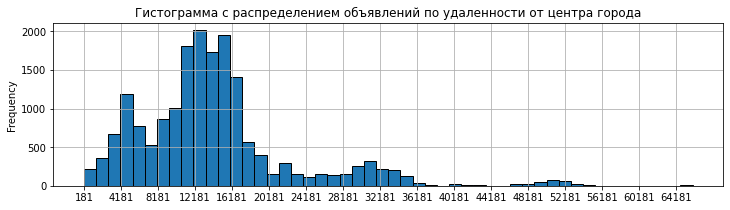

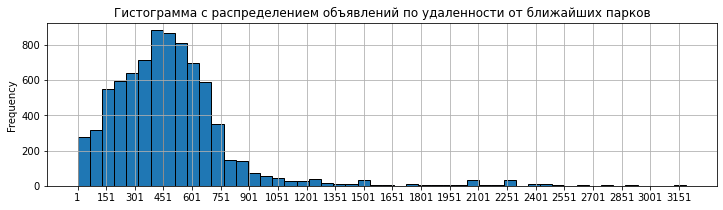

In [41]:
# Выведем на экран основные характеристики для столбцов 'city_centers_nearest' и 'parks_nearest'
display(data[['city_centers_nearest', 'parks_nearest']].describe())

# Построим гистограмму для столбца 'city_centers_nearest'
data['city_centers_nearest'].plot(kind='hist', bins=50, grid=True, ec='black', xticks=(np.arange(min(data['city_centers_nearest']), max(data['city_centers_nearest'])+1, 4000)), title='Гистограмма с распределением объявлений по удаленности от центра города', figsize=(12,3))
plt.show()

# Построим гистограмму для столбца 'parks_nearest'
data['parks_nearest'].plot(kind='hist', bins=50, grid=True, ec='black', xticks=(np.arange(min(data['parks_nearest']), max(data['parks_nearest'])+1, 150)), title='Гистограмма с распределением объявлений по удаленности от ближайших парков', figsize=(12,3))
plt.show()

У большей части квартир из объявлений рядом в доступности до 1 км есть парки для прогулок. У половины объявлений, расстояние до ближайшего парка составляет чуть меньше 500 м.

Удаленность от центра у большинства объявлений составляет до 20 км, что тоже является хорошим показателем при выборе жилья. Около 20% квартир находятся дальше от центра.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Диапазоны для аномальных значений подобраны и удалены тоже верно!
</div>

### Анализ того, как быстро продавались квартиры

count    20465.000000
mean       180.774835
std        219.799101
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

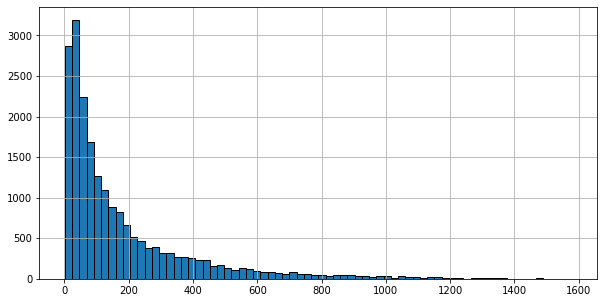

In [42]:
# Выведем на экран основные характеристики для столбца 'days_exposition'
display(data['days_exposition'].describe())

# Построим гистограмму для столбца 'days_exposition'
data['days_exposition'].hist(bins=70, figsize=(10,5), ec='black')

В целом, можно сказать, что почти все квартиры были проданы в течении года с публикации объявления. А половина квартир были проданы всего за 3 месяца. Это среднее время продажи квартиры.Самая быстрая продажа была осуществлена за 1 день. 

Быстрыми продажами можно считать продажи, которые были произведены за 1,5 месяца, а продажи более 231 дня - долгими.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

### Анализ факторов, которые больше всего влияют на общую стоимость объекта

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

,last_price
total_area,
12.0,2400000.0
13.0,2350000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
...,...
507.0,84000000.0
517.0,50000000.0
590.0,65000000.0


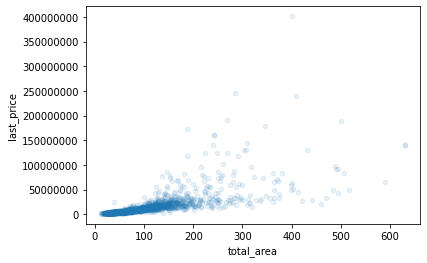

In [43]:
# Проверим, зависит ли цена от общей площади
price_area_pivot = data.pivot_table(index='total_area', values='last_price',  aggfunc='mean')
display(price_area_pivot)

# Для того, чтобы обратиться к столбцу с общей площадью - преобразуем мультииндексы в столбцы
price_area_pivot = price_area_pivot.reset_index()

# Нарисуем облако значений
price_area_pivot.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1) 
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

На графике мы видим, что в объявлениях, где общая площадь квартир составляет примерно до 170 кв. м, зависимость следующая: чем больше площадь, тем больше стоимость квартиры. Однако далее, на слишком больших площадях, на стоимость квартиры начинают влияет другие разные факторы. Например, нахождение квартиры в элитном жилом комплексе, наличие уникальной мебели, наличие в доме бассейнов и закрытых для посещения террас и т.д.

Проделаем то же самое для жилой площади и для площади кухни.

,last_price
living_area,
6.00,3799000.0
6.50,4050000.0
8.00,6850000.0
8.30,4000000.0
8.40,4200000.0
...,...
347.50,91500000.0
406.93,28789000.0
409.00,65000000.0


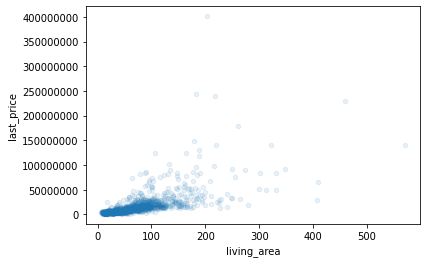

In [44]:
# Проверим, зависит ли цена от жилой площади
price_living_area_pivot = data.pivot_table(index='living_area', values='last_price',  aggfunc='mean')
display(price_living_area_pivot)

# Для того, чтобы обратиться к столбцу с общей площадью - преобразуем мультииндексы в столбцы
price_living_area_pivot = price_living_area_pivot.reset_index()

# Нарисуем облако значений
price_living_area_pivot.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1) 
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

,last_price
kitchen_area,
1.300,"4,250,000.000"
2.000,"2,821,428.571"
2.300,"2,940,000.000"
2.400,"2,200,000.000"
2.890,"5,967,734.000"
...,...
93.000,"65,850,000.000"
93.200,"82,400,000.000"
100.000,"65,000,000.000"


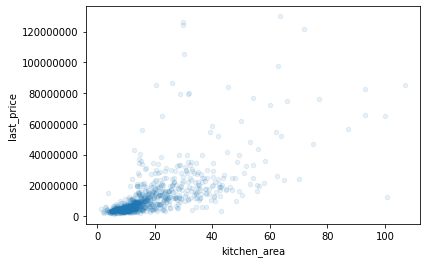

In [45]:
# Проверим, зависит ли цена от площади кухни
# Сделаем так, чтобы в сводной таблице миллионы отображались в полной форме, без 'e8' и т.д.
pd.options.display.float_format ='{:,.3f}'.format

# Создадим сводную таблицу
price_kitchen_area_pivot = data.pivot_table(index='kitchen_area', values='last_price',  aggfunc='mean')
display(price_kitchen_area_pivot)

# Для того, чтобы обратиться к столбцу с общей площадью - преобразуем мультииндексы в столбцы
price_kitchen_area_pivot = price_kitchen_area_pivot.reset_index()

# Нарисуем облако значений
price_kitchen_area_pivot.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1) 
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

Примерно то же самое можно наблюдать на графиках зависимости цены продажи и жилой и кухонной площадях. Однако линия становится более клиновидной, это означает, что с ростом площади (жилой или кухни) цена все-равно остается вариативной: есть и более дешевые квартиры, и более дорогие.

Можем сделать вывод о том, что с ростом площади (жилой или кухни) стоимость растет, однако эти показатели не особо влияют на формирование цены.

,last_price
rooms,
0,"2,700,000.000"
1,"3,600,000.000"
2,"4,775,000.000"
3,"6,200,000.000"
4,"9,000,000.000"
5,"14,000,000.000"
6,"19,000,000.000"
7,"24,900,000.000"
8,"23,095,000.000"


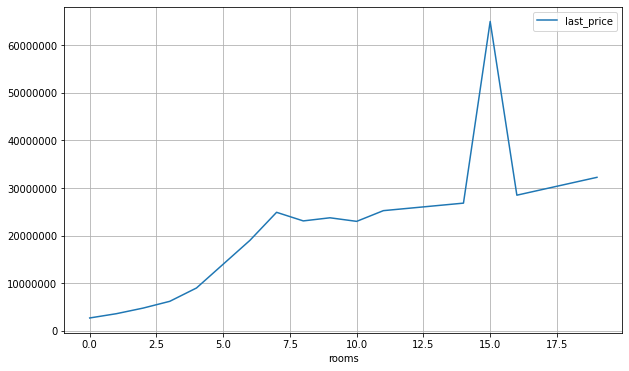

In [46]:
# Проверим, зависит ли цена от количества комнат
# Сделаем так, чтобы в сводной таблице миллионы отображались в полной форме, без 'e8' и т.д.
pd.options.display.float_format ='{:,.3f}'.format

# Создадим сводную таблицу
price_rooms_pivot = data.pivot_table(index='rooms', values='last_price',  aggfunc='median')
display(price_rooms_pivot)

# Построим график
price_rooms_pivot.plot(grid=True, figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

График наглядно показывает, что цена за квартиру растет с количеством комнат. Ожидаемо, что чем больше комнат, тем больше площадь квартиры, поэтому цена растет.

На 15 комнатах есть пик. Это связано с тем, что возможно на 15 комнатах было мало данных и стоимость одной квартиры так сильно повлияла на отображение на графике. Однако этот выброс в цене может быть обусловлен другими факторами.

,last_price
floor_type,
первый,"4,800,464.644"
другой,"6,657,737.748"
последний,"7,011,175.043"


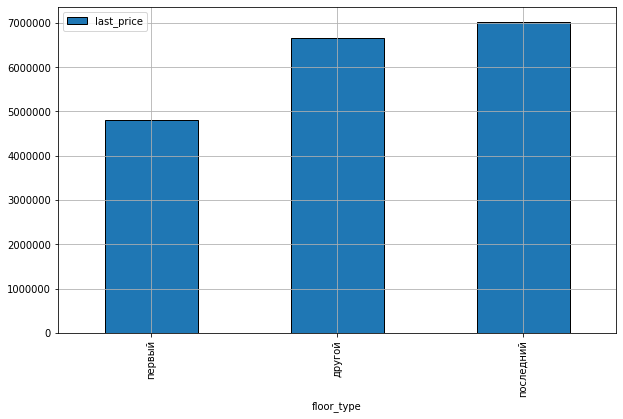

In [47]:
# Проверим, зависит ли цена от этажа, на котором расположена квартира
# Создадим сводную таблицу, отсортируем ее по возрасатнию значений в столбце 'last_price' и выведем на экран
price_floor_pivot = data.pivot_table(index='floor_type', values='last_price',  aggfunc='mean')
price_floor_pivot = price_floor_pivot.sort_values(by='last_price', ascending=True)
display(price_floor_pivot)

# Построим диаграмму
price_floor_pivot.plot(kind='bar', grid=True, figsize=(10,6), ec='black')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

Цены на квартиры на первом этаже ниже, чем на остальных. Разница между ценами квартир на последнем или на каком-либо другом этаже незначительная.

,last_price
year,
2014,"7,640,000.000"
2015,"5,350,000.000"
2016,"4,550,000.000"
2017,"4,500,000.000"
2018,"4,550,000.000"
2019,"5,050,000.000"


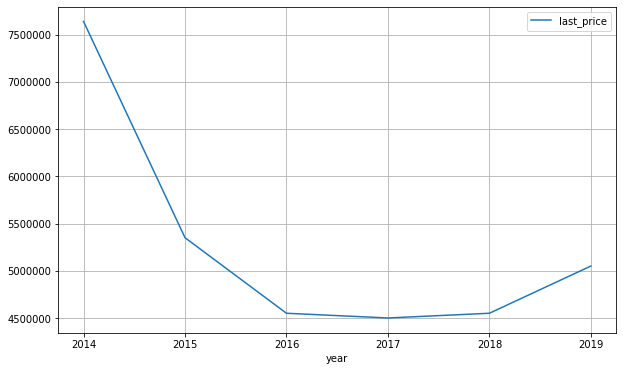

In [48]:
# Проверим, зависит ли цена от даты размещения
# Сначала проверим зависимости от года публикации

# Создадим сводную таблицу, переименуем индекс 'year' и выведем на экран
price_year_pivot = data.pivot_table(index=data['first_day_exposition'].dt.year, values='last_price',  aggfunc='median')
price_year_pivot.index = price_year_pivot.index.rename('year')
display(price_year_pivot)

# Построим график по полученной таблице
price_year_pivot.plot(grid=True, figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

C 2015 года квартиры начали резко дешеветь. С 2016 по 2018 стоили стабильно в среднем 4,5 млн у.е. В 2019 году стоимость снова начала расти.

last_price
year month               
2014 11    13,280,560.000
     12     7,282,500.000
2015 1      7,900,000.000
     2      5,570,000.000
     3      5,672,000.000
     4      5,230,000.000
     5      5,100,000.000
     6      4,875,000.000
     7      5,275,000.000
     8      5,600,000.000
     9      6,258,490.500
     10     5,050,000.000
     11     5,130,000.000
     12     4,880,000.000
2016 1      4,900,000.000
     2      4,625,000.000
     3      4,600,000.000
     4      4,600,000.000
     5      4,325,000.000
     6      4,515,000.000
     7      4,400,000.000
     8      4,070,000.000
     9      4,745,000.000
     10     5,000,000.000
     11     4,450,000.000
     12     4,625,000.000
2017 1      4,580,000.000
     2      4,750,000.000
     3      4,525,000.000
     4      4,650,000.000
     5      4,540,000.000
     6      4,250,000.000
     7      4,500,000.000
     8      4,500,000.000
     9      4,650,000.000
     10     4,300,000.000
     11     4,500,000.000
     12     4,400,000.000
2018 1      4,300,000.000
     2      4,350,000.000
     3      4,250,000.000
     4      4,500,000.000
     5      4,650,000.000
     6      4,400,000.000
     7      4,700,000.000
     8      4,613,273.000
     9      4,625,000.000
     10     4,700,000.000
     11     4,800,000.000
     12     5,100,000.000
2019 1      5,000,000.000
     2      5,200,000.000
     3      5,000,000.000
     4      5,048,500.000
     5      5,250,000.000

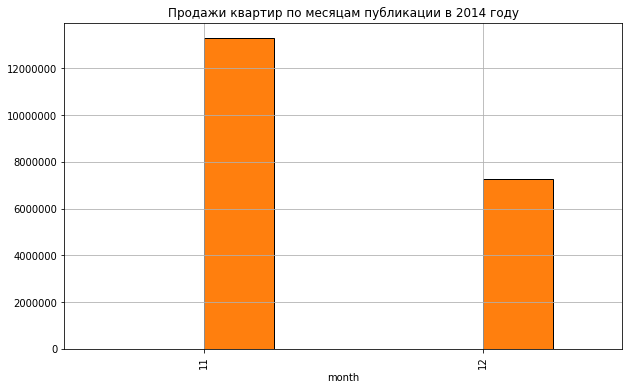

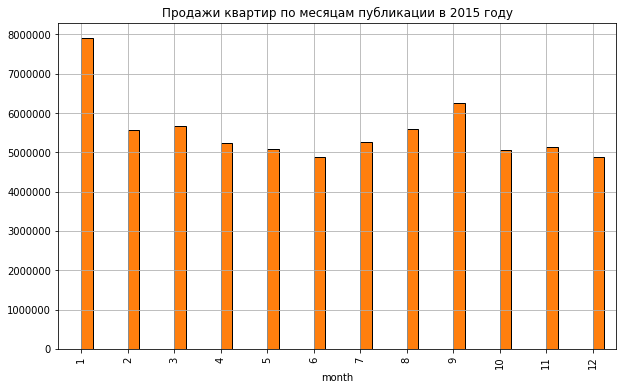

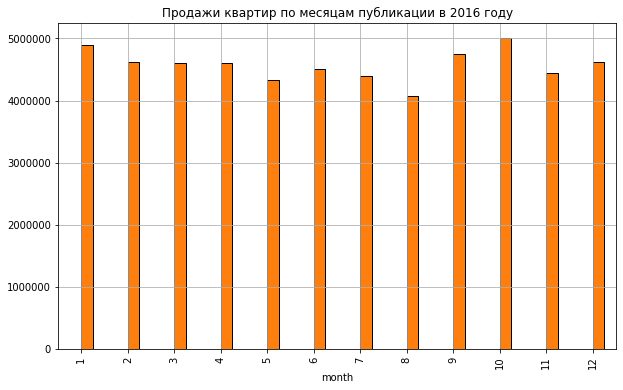

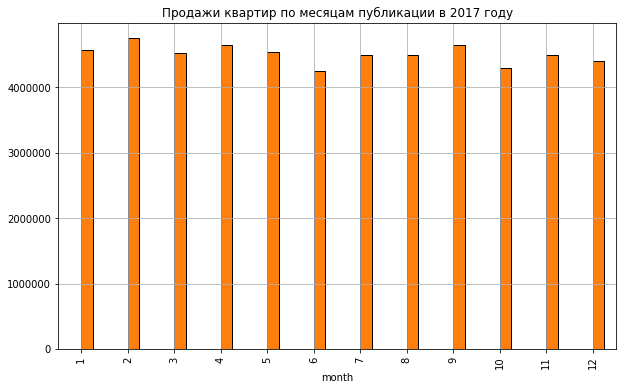

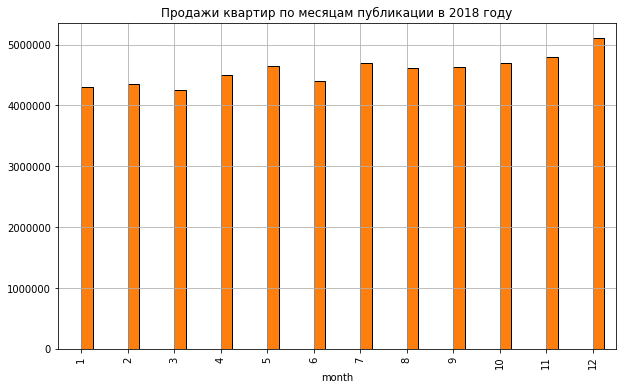

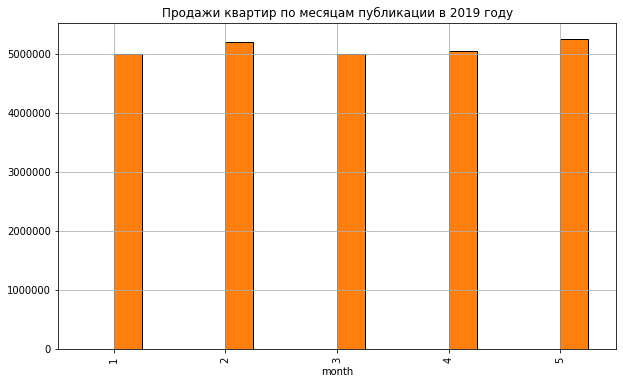

In [49]:
# Теперь проверим зависимости по месяцам публикации, но все же отсортированным по годам

# Создадим сводную таблицу (для разнообразия методом groupby), переименуем индексы в 'year' и 'month' и выведем на экран
price_year_month_pivot = data.groupby([data['first_day_exposition'].dt.year, data['first_day_exposition'].dt.month]).agg({'last_price':'median'})
price_year_month_pivot.index = price_year_month_pivot.index.rename(['year', 'month'])
display(price_year_month_pivot)

# Для того, чтобы обратиться к столбцу с годом - преобразуем мультииндексы в столбцы
price_year_month_pivot = price_year_month_pivot.reset_index()

# Зададим функцию для построения графиков по годам
def build_hist_month(year):
    price_year_month_pivot.loc[price_year_month_pivot['year'] == year].plot(x='month', kind='bar', grid=True, figsize=(10,6), ec='black', legend=False)
    plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    plt.title(f'Продажи квартир по месяцам публикации в {year} году')
    plt.show()
    
# Построим диаграммы по дням недели для каждого года
build_hist_month(2014)
build_hist_month(2015)
build_hist_month(2016)
build_hist_month(2017)
build_hist_month(2018)
build_hist_month(2019)

В 2015-2016 годах можно выделить месяцы с наибольшими ценами продаж: январь - сентябрь. Но дальше сильная зависимость пропадает. Можно проследить небольшую просадку в летние месяцы, но на не существенна. Таким образом, можно сделать вывод о том, что месяц не влияет на цену продажи.

last_price
year weekday               
2014 0        4,850,000.000
     1       11,629,000.000
     2        5,990,000.000
     3       12,015,500.000
     4        4,350,000.000
     5        6,500,000.000
     6        6,540,000.000
2015 0        5,175,000.000
     1        5,052,500.000
     2        5,390,000.000
     3        5,895,000.000
     4        5,269,500.000
     5        4,270,000.000
     6        6,142,500.000
2016 0        4,495,000.000
     1        4,400,000.000
     2        4,695,000.000
     3        4,800,000.000
     4        4,550,000.000
     5        4,490,000.000
     6        4,350,000.000
2017 0        4,600,000.000
     1        4,480,000.000
     2        4,500,000.000
     3        4,600,000.000
     4        4,400,000.000
     5        4,500,000.000
     6        4,560,000.000
2018 0        4,500,000.000
     1        4,762,500.000
     2        4,695,000.000
     3        4,450,000.000
     4        4,500,000.000
     5        4,600,000.000
     6        4,500,000.000
2019 0        5,195,000.000
     1        5,100,000.000
     2        5,300,000.000
     3        5,050,000.000
     4        5,000,000.000
     5        4,749,750.000
     6        4,700,000.000

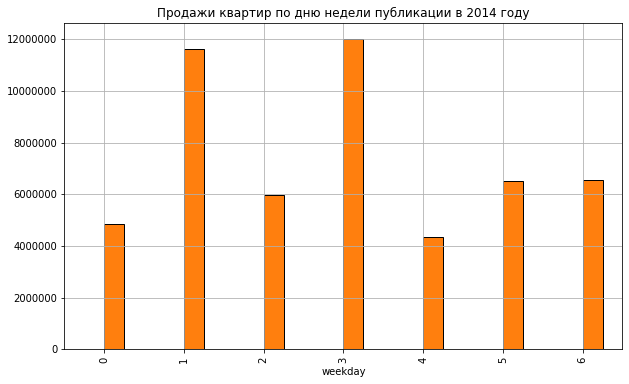

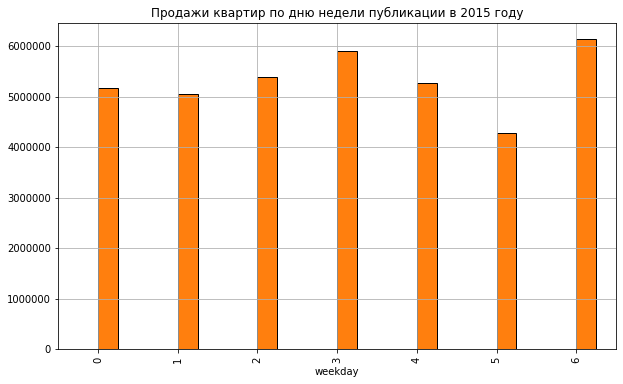

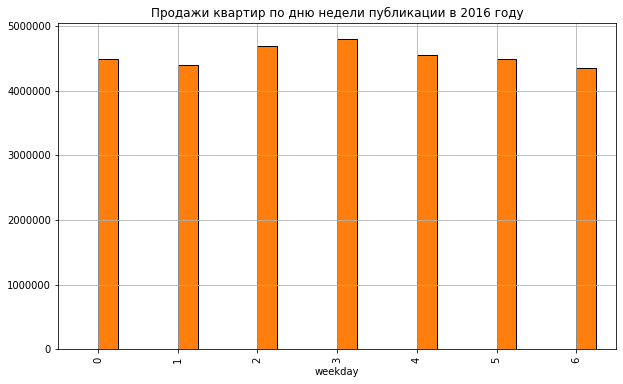

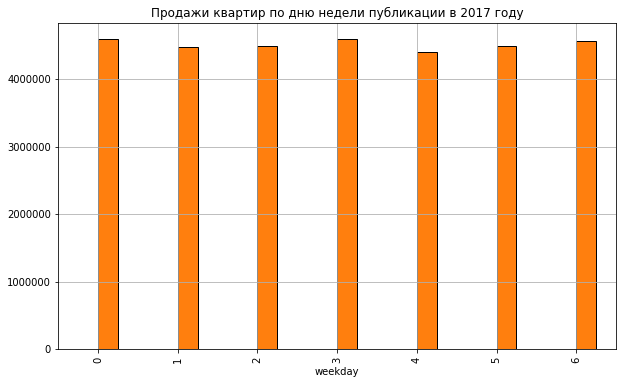

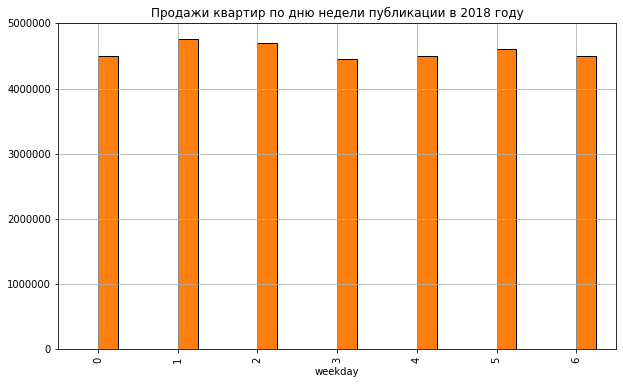

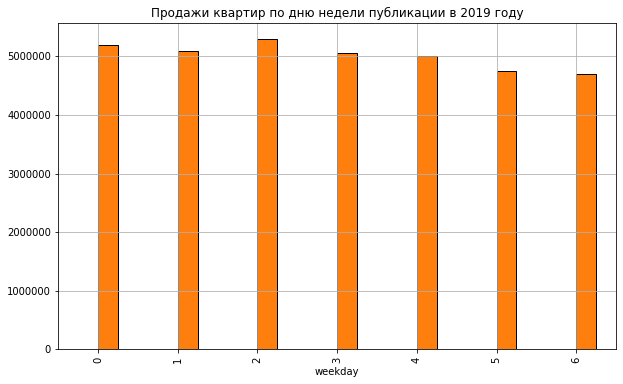

In [50]:
# Теперь проверим зависимости по дням недели публикации, но все же отсортированными по годам

# Создадим сводную таблицу (для разнообразия методом groupby), переименуем индексы в 'year' и 'weekday' и выведем на экран
price_year_weekday_pivot = data.groupby([data['first_day_exposition'].dt.year, data['first_day_exposition'].dt.weekday]).agg({'last_price':'median'})
price_year_weekday_pivot.index = price_year_weekday_pivot.index.rename(['year', 'weekday'])
display(price_year_weekday_pivot)

# Для того, чтобы обратиться к столбцу с годом - преобразуем мультииндексы в столбцы
price_year_weekday_pivot = price_year_weekday_pivot.reset_index()

# Зададим функцию для построения графиков по годам
def build_hist_weekday(year):
    price_year_weekday_pivot.loc[price_year_weekday_pivot['year'] == year].plot(x='weekday', kind='bar', grid=True, figsize=(10,6), ec='black', legend=False)
    plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    plt.title(f'Продажи квартир по дню недели публикации в {year} году')
    plt.show()
    
# Построим диаграммы по дням недели для каждого года
build_hist_weekday(2014)
build_hist_weekday(2015)
build_hist_weekday(2016)
build_hist_weekday(2017)
build_hist_weekday(2018)
build_hist_weekday(2019)

В 2014 году вторник и четверг были наиболее благоприятными днями для публикации объявления. Однако далее зависимость от дня недели публикации не прослеживается. 

Таким образом, делая вывод по всему разделу, ожидаемо, на стоимость квартиры наибольшим образом влияет общая площадь квартиры и, соответственно, количество комнат. Также, квартиры на первом этаже чаще стоят дешевле. Дата размещения объявления влияет на стоимость квартиры только глобально, в разрезе года. Это зависит от множества внешних факторов, в т.ч. экономической и политической обстановки. Месяц и день недели никакого влияения не оказывают.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

### Средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [51]:
# Найдем 10 населенных пунктов с наибольшим числом объявлений
data['locality_name'].value_counts().head(10)

санкт-петербург      15717
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

,count,mean_price_per_meter
locality_name,,
санкт-петербург,15717,"114,689.967"
поселок мурино,556,"85,681.763"
поселок шушары,440,"78,677.364"
всеволожск,398,"68,654.474"
пушкин,369,"103,125.819"
колпино,338,"75,424.579"
поселок парголово,327,"90,175.913"
гатчина,307,"68,746.147"
деревня кудрово,299,"92,473.548"


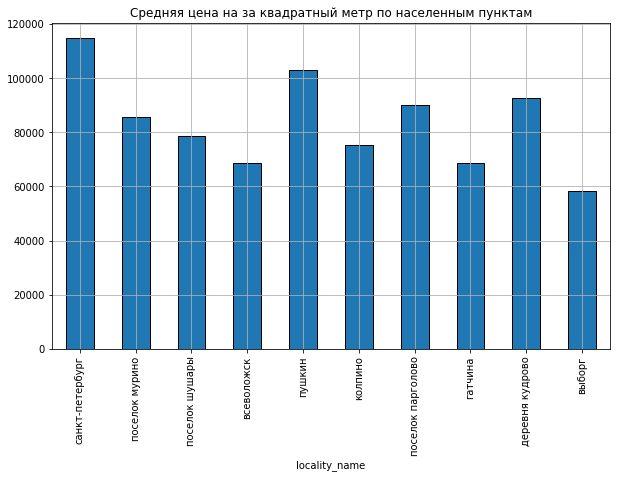

In [52]:
# Создадим сводную таблицу со средними значениями столбца 'price_per_meter'
popular_locations_pivot = data.pivot_table(index='locality_name', values='price_per_meter',  aggfunc=['count', 'mean'])

# Переименуем столбцы
popular_locations_pivot.columns = ['count', 'mean_price_per_meter']

# Отсортируем по возрастанию столбца 'count'
popular_locations_pivot = popular_locations_pivot.sort_values(by='count', ascending=False).head(10)

display(popular_locations_pivot)

# Построим диаграмму значений
popular_locations_pivot['mean_price_per_meter'].plot(kind='bar', grid=True, figsize=(10,6), ec='black', legend=False)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title(f'Средняя цена на за квадратный метр по населенным пунктам')
plt.show()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👏🏻👏🏻👏🏻 Отличная визуализация! Не забывай добавлять сортировку
</div>

Наиболее высокая цена за кв. метр в городах Санкт-Петербург и Пушкин. Она составляет 114,689.967 и 103,125.819 у.е. соответственно. 

### Средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра

/tmp/ipykernel_521/637258808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_distance_from_center['city_centers_nearest_km'] = spb_distance_from_center['city_centers_nearest_km'].round(0)


,mean_last_price
city_centers_nearest_km,
0.000,"31,449,115.852"
1.000,"21,206,720.828"
2.000,"17,788,319.613"
3.000,"11,138,691.550"
4.000,"12,423,729.172"
5.000,"14,041,721.113"
6.000,"15,323,939.618"
7.000,"14,795,129.392"
8.000,"9,246,843.242"


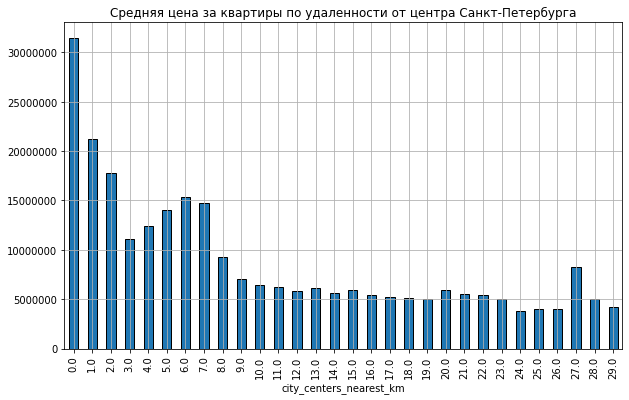

In [53]:
# Создадим датафрейм, где в столбце 'locality_name' только город Санкт-Петербург
spb_distance_from_center = data.loc[data['locality_name'] == 'санкт-петербург']

# Округлим значения в столбце 'city_centers_nearest_km' до целого
spb_distance_from_center['city_centers_nearest_km'] = spb_distance_from_center['city_centers_nearest_km'].round(0)

# Создадим сводную таблицу со средними значениями столбца 'price_per_meter'
spb_distance_from_center_pivot = spb_distance_from_center.pivot_table(index='city_centers_nearest_km', values='last_price',  aggfunc=['mean'])

# Переименуем столбец
spb_distance_from_center_pivot.columns = ['mean_last_price']

display(spb_distance_from_center_pivot)

# Построим диаграмму значений
spb_distance_from_center_pivot.plot(kind='bar', grid=True, figsize=(10,6), ec='black', legend=False)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title(f'Средняя цена за квартиры по удаленности от центра Санкт-Петербурга')
plt.show()

Ожидаемо, квартиры в самом центре - стоят дороже всего. С удаленностью от центра стоимость за кв. метр падает. 

Однако, на удалении от 3 до 7 км можно заметить обратную зависимость: квартиры на радуисе 7 км стоят дороже. Возможно, это связанно с близостью к станциям метро или нахождением на этом радиусе какого-то элитного района, где квартиры более дорогие.

Также есть выброс на удаленности 27 км. Также, как и в предыдущем случае, это может быть обусловленно наличием другого выгодного фактора для покупки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

## Напишите общий вывод

Был проанализирован датасет объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет: с конца 2014-го по середину 2019-го года.

В первую очередь была выполнена предобработка данных: найдены и заменены пропущенные значения, типы данных, устранены неявные дубликаты. Далее созданы новые столбцы для последующего анализа датасета. 

Для ключевых параметров построены гистограммы, проанализированы данные и обработаны выбивающиеся значения.

Далее проанализировано количество дней продажи квартир. Почти все квартиры были проданы в течении года с публикации объявления. А половина квартир были проданы всего за 3 месяца. Это среднее время продажи квартиры. Самая быстрая продажа была осуществлена за 1 день.

Затем были выделены следующие параметры, влияющие на цену объектов в большей мере:
- общая площадь;
- количество комнат;
- этаж.

На стоимость квартиры наибольшим образом влияет общая площадь квартиры и, соответственно, количество комнат. Когда общая площадь квартир составляет примерно до 170 кв. м: чем больше площадь, тем больше стоимость квартиры. Однако далее, на слишком больших площадях, на стоимость квартиры начинают влияет другие разные факторы. Примерно то же самое можно наблюдать на графиках зависимости цены продажи и жилой и кухонной площадях, но ростом площади (жилой или кухни) цена все-равно остается вариативной: есть и более дешевые квартиры, и более дорогие. Также, квартиры на первом этаже чаще стоят дешевле. Разница между ценами квартир на последнем или на каком-либо другом этаже незначительная. Дата размещения объявления влияет на стоимость квартиры только глобально, в разрезе года. Это зависит от множества внешних факторов, в т.ч. экономической и политической обстановки. Месяц и день недели никакого влияения не оказывают.

После был проведен анализ средней цены за кв. м в 10 населенных пунктах с наибольшим числом объявлений. Наиболее высокая цена за кв. метр в городах Санкт-Петербург и Пушкин. Она составляет 114,689.967 и 103,125.819 у.е. соответственно.

В заключение были рассмотрены все объявления в г. Санкт-Петербург и вычислена средняя стоимость жилья на разной удаленности от центра города. Ожидаемо, квартиры в самом центре - стоят дороже всего. С удаленностью от центра стоимость за кв. метр падает. Однако, на удалении от 3 до 7 км можно заметить обратную зависимость: квартиры на радуисе 7 км стоят дороже. Возможно, это связанно с близостью к станциям метро или нахождением на этом радиусе какого-то элитного района, где квартиры более дорогие.

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v1:</b>
<br>Я бы мог принять твою работу с первого раза, но хочу дать тебе возможность задать мне вопросы) Если вопросов нет, то я с радостью приму проект)
</div>

<div class="alert alert-info">
<b>Комментарий студента v1:</b>
<br>Спасибо! С желтыми комменподправила, вопросов нет! :)
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Тогда мне ничего не остается, кроме как принять твой проект!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>